<a href="https://colab.research.google.com/github/rizqi211199/MyPortofolioData/blob/main/face_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pada pandemi saat ini kita dianjurkan untuk mengukuti prokes dengan ketat guna melindungi diri dari virus covid 19. salah satunya adalah menggunakan masker, untuk memasuki suatu area tertentu seperti mall, supermarket, bioskop, rumah sakit dan tempat wisata kita di anjurkan untuk mengenakan masker. pada situasi ini diperlukan sebuah alat untuk mengidentifikasi seseorang itu mengenakan masker atau tidak. project kali ini akan membuat model menggunakan NLP dan tensorflow untuk mengidentifikasi seseorang mengenakan masker atau tidak mengenakan masker.

In [ ]:
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
 local_zip = !ls "/content/drive/MyDrive/Colab Notebooks/face_mask.zip"

In [ ]:
#ekstraksi file
import zipfile, os
local_zip = "/content/drive/MyDrive/Colab Notebooks/face_mask.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
base_dir = 'face_mask'

In [ ]:
!pip install split_folders

In [ ]:
#split folder
import splitfolders
splitfolders.ratio('face_mask', output='face_mask', seed= 1337, ratio= (0.8, 0.2))

Copying files: 10992 files [00:02, 4029.85 files/s]


In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('face_mask/train')
os.listdir('face_mask/val')
print(len(os.listdir('face_mask/train/WithMask')))
print(len(os.listdir('face_mask/train/WithoutMask')))
print(len(os.listdir('face_mask/val/WithMask')))
print(len(os.listdir('face_mask/val/WithoutMask')))

4386
4407
1097
1102


In [ ]:
#membuat direktori pada direktori data training
train_withmask = os.path.join(train_dir,'WithMask')

train_withoutmask = os.path.join(train_dir, 'WithoutMask')

#membuat direktori  pada data validation
val_withmask = os.path.join(val_dir,'WithMask')

val_withoutmask = os.path.join(val_dir, 'WithoutMask')

In [ ]:
#augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 20,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest',
                                   width_shift_range= 0.2,
                                   height_shift_range= 0.2,
                                   vertical_flip = True)
val_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 20,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest',
                                   width_shift_range= 0.2,
                                   height_shift_range= 0.2,
                                   vertical_flip = True)

In [ ]:
#mempersiapkan data latih
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size =(150,150),
    batch_size = 18,
    class_mode = 'binary')
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size= 14,
    class_mode='binary'
)

Found 8793 images belonging to 2 classes.
Found 2199 images belonging to 2 classes.


In [ ]:
#arsitektur cnn
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

In [ ]:
#callback
#pengggunaan callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc'and'acc')>0.92):
      print("\nAkurasi mencapai 92%")
      self.model.stop_training=True

callbacks = myCallback()

In [ ]:
#compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['acc'])

In [ ]:
#melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=488,
    epochs= 40,
    validation_data=val_generator,
    validation_steps = 157,
    verbose=2,
    callbacks= callbacks)

Epoch 1/40
488/488 - 276s - loss: 0.3524 - acc: 0.8447 - val_loss: 0.2507 - val_acc: 0.8995
Epoch 2/40
488/488 - 272s - loss: 0.2637 - acc: 0.9005 - val_loss: 0.2095 - val_acc: 0.9254
Epoch 3/40
488/488 - 285s - loss: 0.2258 - acc: 0.9162 - val_loss: 0.1951 - val_acc: 0.9277
Epoch 4/40
488/488 - 271s - loss: 0.2101 - acc: 0.9232 - val_loss: 0.2106 - val_acc: 0.9277

Akurasi mencapai 92%


Saving 3.png to 3.png
3.png
with mask


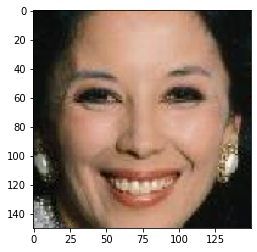

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
 
uploaded = files.upload()
for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0, 0]==1:
    print('without mask')
  else:
    print('with mask')

In [ ]:
#plot loss dan akurasi
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

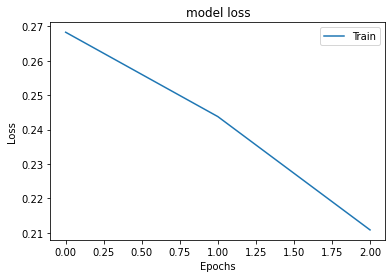

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper right')
plt.show

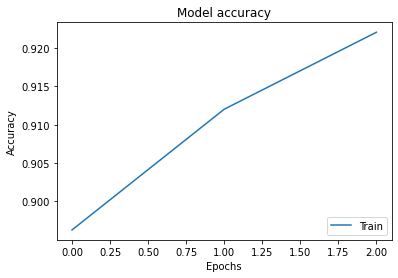

In [ ]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='lower right')
plt.show()

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpyilonwzr/assets


In [ ]:
with tf.io.gfile.GFile('face_mask.tflite', 'wb') as f:
  f.write(tflite_model)